In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hi = pd.read_csv('../../뉴스 데이터/stock/하이닉스주식.csv', encoding='cp949')

In [3]:
hi = hi.drop(columns = '누적체결매도수량')
hi = hi.drop(columns = '누적체결매수수량')
hi = hi.drop(columns = '종목코드')
hi = hi.drop(columns = '종목명')
hi = hi.drop(columns = '시간')
hi = hi.drop(columns = '거래대금')

In [4]:
hi.set_index('날짜',inplace=True)

In [5]:
hi

,시가,고가,저가,종가,거래량
날짜,,,,,
20210616,128000.0,128500.0,127500.0,127500.0,30265.0
20210616,127500.0,128000.0,127500.0,127500.0,31521.0
20210616,127500.0,128000.0,127500.0,128000.0,32558.0
20210616,128000.0,128000.0,127500.0,128000.0,34810.0
20210616,128000.0,128000.0,127500.0,127500.0,88528.0
...,...,...,...,...,...
20230623,113600.0,113700.0,113500.0,113700.0,1239811.0
20230623,113600.0,113900.0,113600.0,113600.0,1249310.0
20230623,113700.0,113800.0,113600.0,113700.0,1252913.0


In [10]:
print(hi.shape)

(190379, 6)


In [6]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

hi = MinMaxScaler(hi)

In [10]:
dfx = hi[['시가','고가','저가','종가', '거래량']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]
dfx = dfx[['시가','고가','저가', '거래량']]
dfx

,시가,고가,저가,거래량
날짜,,,,
20210616,0.901478,0.909241,0.900662,0.002685
20210616,0.893268,0.900990,0.900662,0.002796
20210616,0.893268,0.900990,0.900662,0.002889
20210616,0.901478,0.900990,0.900662,0.003089
20210616,0.901478,0.900990,0.900662,0.007865
...,...,...,...,...
20230623,0.665025,0.665016,0.668874,0.110233
20230623,0.665025,0.668317,0.670530,0.111077
20230623,0.666667,0.666667,0.670530,0.111398


In [14]:
dfy

,종가
날짜,
20210616,0.900662
20210616,0.900662
20210616,0.908940
20210616,0.908940
20210616,0.900662
...,...
20230623,0.672185
20230623,0.670530
20230623,0.672185


In [15]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [17]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.660098456157642, 0.660065940594066, 0.6655628473510001, 0.10883529909356626], [0.660098456157642, 0.660065940594066, 0.6655628473510001, 0.10905252048893334], [0.660098456157642, 0.660065940594066, 0.6655628473510001, 0.1092435117117121], [0.660098456157642, 0.660065940594066, 0.6655628473510001, 0.10932353596706632], [0.660098456157642, 0.6617161054455512, 0.6655628473510001, 0.10951728358086282], [0.6633825280788244, 0.6633662702970363, 0.66721847632451, 0.10986209920560025], [0.6650245640394155, 0.6650164351485216, 0.66887410529802, 0.11023261150789031], [0.6650245640394155, 0.6683167648514918, 0.67052973427153, 0.1110772230652345], [0.6666666000000065, 0.6666666000000067, 0.67052973427153, 0.11139758683416925], [0.6666666000000065, 0.6666666000000067, 0.67052973427153, 0.11163650369432124]] -> [0.67052973427153]


In [18]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 190369 190369


In [19]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (133258, 10, 4) (133258, 1)
테스트 데이터의 크기 : (57111, 10, 4) (57111, 1)


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [21]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=10, batch_size=50)
pred_y = model.predict(test_X)

Epoch 1/10
2666/2666 [==============================] - 306s 114ms/step - loss: 8.8489e-04
Epoch 2/10
2666/2666 [==============================] - 312s 117ms/step - loss: 8.5867e-04
Epoch 3/10
2666/2666 [==============================] - 319s 120ms/step - loss: 8.4857e-04
Epoch 4/10
2666/2666 [==============================] - 340s 128ms/step - loss: 8.4295e-04
Epoch 5/10
2666/2666 [==============================] - 360s 135ms/step - loss: 8.2797e-04
Epoch 6/10
2666/2666 [==============================] - 317s 119ms/step - loss: 8.3102e-04
Epoch 7/10
2666/2666 [==============================] - 317s 119ms/step - loss: 8.2081e-04
Epoch 8/10
2666/2666 [==============================] - 319s 120ms/step - loss: 8.3107e-04
Epoch 9/10
2666/2666 [==============================] - 436s 163ms/step - loss: 8.1612e-04
Epoch 10/10
1785/1785 [==============================] - 20s 11ms/step


   1/1785 [..............................] - ETA: 48s

1785/1785 [==============================] - 23s 13ms/step


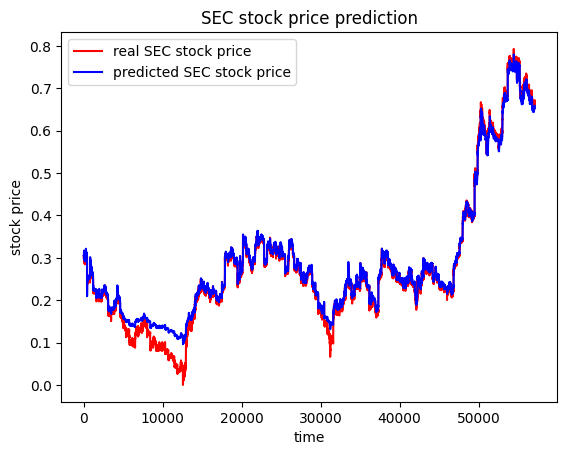

KeyError: -1

In [27]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='실제 stock price')
plt.plot(pred_y, color='blue', label='예상 stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", dfy.종가[-1] * pred_y[-1] / dfy.종가[-1], 'KRW')

In [12]:
hi

,시가,고가,저가,종가,거래량
날짜,,,,,
20210616,0.901478,0.909241,0.900662,0.900662,0.002685
20210616,0.893268,0.900990,0.900662,0.900662,0.002796
20210616,0.893268,0.900990,0.900662,0.908940,0.002889
20210616,0.901478,0.900990,0.900662,0.908940,0.003089
20210616,0.901478,0.900990,0.900662,0.900662,0.007865
...,...,...,...,...,...
20230623,0.665025,0.665017,0.668874,0.672185,0.110233
20230623,0.665025,0.668317,0.670530,0.670530,0.111077
20230623,0.666667,0.666667,0.670530,0.672185,0.111398


In [10]:
def MinMaxScaler(data):

    numerator = data - np.min(data, 0)

    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

hi = hi[['시가','고가','저가','종가', '거래량']]

hi = MinMaxScaler(hi)

In [11]:
hi

,시가,고가,저가,종가,거래량
날짜,,,,,
20210616,0.901478,0.909241,0.900662,0.900662,0.002685
20210616,0.893268,0.900990,0.900662,0.900662,0.002796
20210616,0.893268,0.900990,0.900662,0.908940,0.002889
20210616,0.901478,0.900990,0.900662,0.908940,0.003089
20210616,0.901478,0.900990,0.900662,0.900662,0.007865
...,...,...,...,...,...
20230623,0.665025,0.665017,0.668874,0.672185,0.110233
20230623,0.665025,0.668317,0.670530,0.670530,0.111077
20230623,0.666667,0.666667,0.670530,0.672185,0.111398


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = hi
X = data.iloc[:, :]
y = data.iloc[:, :]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()

model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(0, 152303 , 5)))

model.add(Dropout(0.5))

model.add(LSTM(units=20, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()

In [ ]:
# X_train = np.reshape(X_train, (X_train.shape[152303], 20, 4))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=40)

y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)


plt.figure()

plt.plot(y_test, color='red', label='real SPY stock price')

plt.plot(y_pred, color='blue', label='predicted SPY stock price')

plt.title('SPY stock price prediction')

plt.xlabel('time')

plt.ylabel('stock price')

plt.legend()

plt.show()


print("내일 SPY 주가 :", hi.종가[-1] * y_pred[-1] / hi.종가[-1])

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)

ax.plot(hi['고가'], label='hi', color='b')

ax.set_ylabel('price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
from keras. layers import LSTM

In [ ]:
import tensorflow as tf
import keras

In [ ]:
original_open = hi['시가'].values

date = pd.to_datetime(hi['날짜'])

In [ ]:
cols = list(hi)[4:8]

hi = hi[cols]. astype(float)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(hi)
stock_data_scaled = scaler.transform(hi)

In [ ]:
# split to train data and test data
n_train = int(0.9*stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = '날짜'[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = '날짜'[n_train:]

In [ ]:
# data reformatting for LSTM
pred_days = 1  # prediction period
seq_len = 14   # sequence length = past days for future prediction.
input_dim = 4  # input_dimension = ['Open', 'High', 'Low', 'Close', 'Volume']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))
list = []

model.summary()

In [ ]:
# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)


trainX = []
trainY = []
testX = []
testY = []

# plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../../뉴스 데이터/stock/하이닉스주식.csv', encoding='cp949')
X = data.iloc[:, :]
y = data.iloc[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
